In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Function to compute the stochastic subgradient
def compute_subgradient(x, Z):
    x0, x1, x2 = x
    Z1, Z2, Z3 = Z
    value = x0 + np.exp(Z1) * x1 + np.exp(Z2) * x2 - np.exp(Z3)
    subgrad = np.array([1, np.exp(Z1), np.exp(Z2)]) if value > 0 else np.array([-1, -np.exp(Z1), -np.exp(Z2)])
    return subgrad

# Stochastic subgradient method
def stochastic_subgradient_method(step_size_type="linear", a=0.1, iterations=1000):
    np.random.seed(42)  # For reproducibility

    # Initialization
    x = np.zeros(3)  # Initial guess [x0, x1, x2]
    x_avg = np.zeros(3)  # To track average of iterates

    xs = []
    x_avgs = []

    for k in range(1, iterations + 1):
        # Sample Z ~ N(mean, cov)
        Z = np.random.multivariate_normal(mean, covariance)

        # Compute subgradient
        subgrad = compute_subgradient(x, Z)

        # Step size
        if step_size_type == "linear":
            alpha_k = a / (k + 1)
        elif step_size_type == "sqrt":
            alpha_k = a / np.sqrt(k + 1)
        else:
            raise ValueError("Invalid step size type. Choose 'linear' or 'sqrt'.")

        # Update x
        x = x - alpha_k * subgrad

        # Update running average
        x_avg = (x_avg * (k - 1) + x) / k

        if k%1000 == 0:
            xs.append(x)
            x_avgs.append(x_avg)

    return xs, x_avgs

In [46]:

mean = np.array([0.3, 0.3, 0.5])
covariance = np.array([[0.1, -0.05, 0.05],
                       [-0.05, 0.1, 0.05],
                       [0.05, 0.05, 0.12]])


## Linear Case with a = 1

In [47]:
# Parameters
a =  1
iterations = 100000

# Run the method with linear step size
x_final_linear, x_avg_linear = stochastic_subgradient_method(step_size_type="linear", a=a, iterations=iterations)
print("Final x (linear step size):", x_final_linear[-1])
print("Average x (linear step size):", x_avg_linear[-1])

Final x (linear step size): [-0.16764213  0.65917802  0.6594618 ]
Average x (linear step size): [-0.10422549  0.63686435  0.63757083]


In [48]:
x_final_linear

[array([0.1410935 , 0.56937815, 0.54274742]),
 array([0.09393165, 0.59577958, 0.55771627]),
 array([0.06164989, 0.58475083, 0.57790047]),
 array([0.03837927, 0.58489945, 0.58114873]),
 array([0.01777634, 0.57673256, 0.57966037]),
 array([0.01229381, 0.59219418, 0.59494416]),
 array([0.00704841, 0.60212354, 0.60481833]),
 array([-0.00249719,  0.60503486,  0.60551696]),
 array([-0.01386719,  0.60560041,  0.60158059]),
 array([-0.01987185,  0.61171178,  0.60488325]),
 array([-0.02639927,  0.61382634,  0.6070889 ]),
 array([-0.03093057,  0.6168518 ,  0.61347842]),
 array([-0.03366089,  0.62160307,  0.61999942]),
 array([-0.0427565 ,  0.61669561,  0.61704614]),
 array([-0.04596336,  0.62028273,  0.61958357]),
 array([-0.04962306,  0.62171067,  0.62326708]),
 array([-0.05649477,  0.61849822,  0.62010859]),
 array([-0.05901715,  0.6229107 ,  0.62262934]),
 array([-0.06360986,  0.62333349,  0.62176177]),
 array([-0.06650967,  0.62505487,  0.62340986]),
 array([-0.07194645,  0.6217922 ,  0.6223

In [56]:
index =40

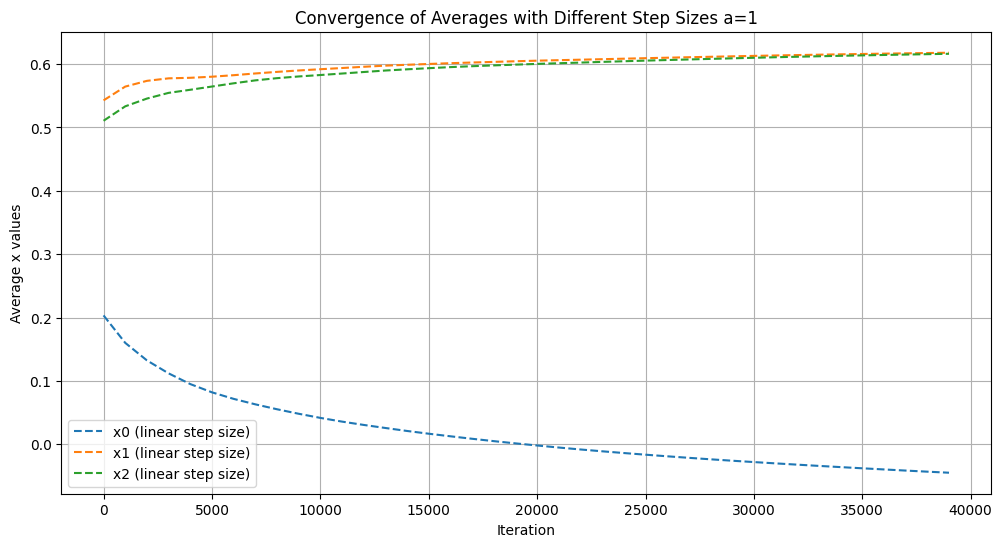

In [59]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot linear step size averages
plt.plot(np.arange(0,len(x_avg_linear[:index]))*1000,np.array(x_avg_linear)[:index, 0], label="x0 (linear step size)", linestyle="--")
plt.plot(np.arange(0,len(x_avg_linear[:index]))*1000,np.array(x_avg_linear)[:index, 1], label="x1 (linear step size)", linestyle="--")
plt.plot(np.arange(0,len(x_avg_linear[:index]))*1000,np.array(x_avg_linear)[:index, 2], label="x2 (linear step size)", linestyle="--")

plt.xlabel("Iteration")
plt.ylabel("Average x values")
plt.title("Convergence of Averages with Different Step Sizes a=1")
plt.legend()
plt.grid()
plt.show()

## Sqrt Case with a = 1

In [50]:
# Run the method with sqrt step size
a =  1
iterations = 100000
x_final_sqrt, x_avg_sqrt = stochastic_subgradient_method(step_size_type="sqrt", a=a, iterations=iterations)
print("Final x (sqrt step size):", x_final_sqrt[-1])
print("Average x (sqrt step size):", x_avg_sqrt[-1])


Final x (sqrt step size): [-1.37219413  1.07993642  1.08770099]
Average x (sqrt step size): [-1.3680038   1.09435813  1.09528376]


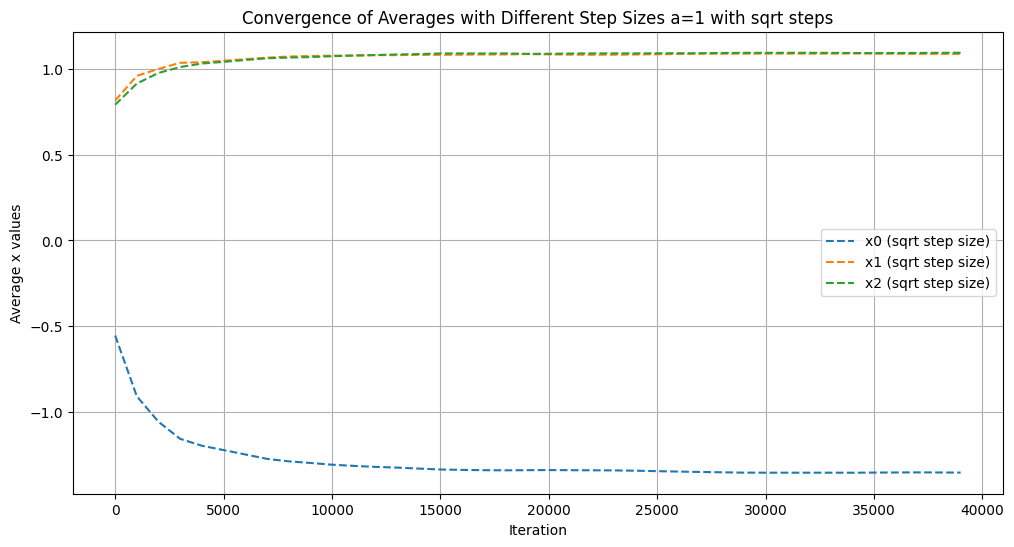

In [61]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot linear step size averages
plt.plot(np.arange(0,len(x_avg_sqrt[:index]))*1000,np.array(x_avg_sqrt)[:index, 0], label="x0 (sqrt step size)", linestyle="--")
plt.plot(np.arange(0,len(x_avg_sqrt[:index]))*1000,np.array(x_avg_sqrt)[:index, 1], label="x1 (sqrt step size)", linestyle="--")
plt.plot(np.arange(0,len(x_avg_sqrt[:index]))*1000,np.array(x_avg_sqrt)[:index, 2], label="x2 (sqrt step size)", linestyle="--")

plt.xlabel("Iteration")
plt.ylabel("Average x values")
plt.title("Convergence of Averages with Different Step Sizes a=1 with sqrt steps")
plt.legend()
plt.grid()
plt.show()

## Linear Case with a = 100

In [52]:
a =  100
iterations = 100000

# Run the method with linear step size
x_final_linear_100, x_avg_linear_100 = stochastic_subgradient_method(step_size_type="linear", a=a, iterations=iterations)
print("Final x (linear step size):", x_final_linear_100[-1])
print("Average x (linear step size):", x_avg_linear_100[-1])

Final x (linear step size): [-1.38796469  1.09468395  1.0748418 ]
Average x (linear step size): [-1.37399245  1.10190063  1.09497028]


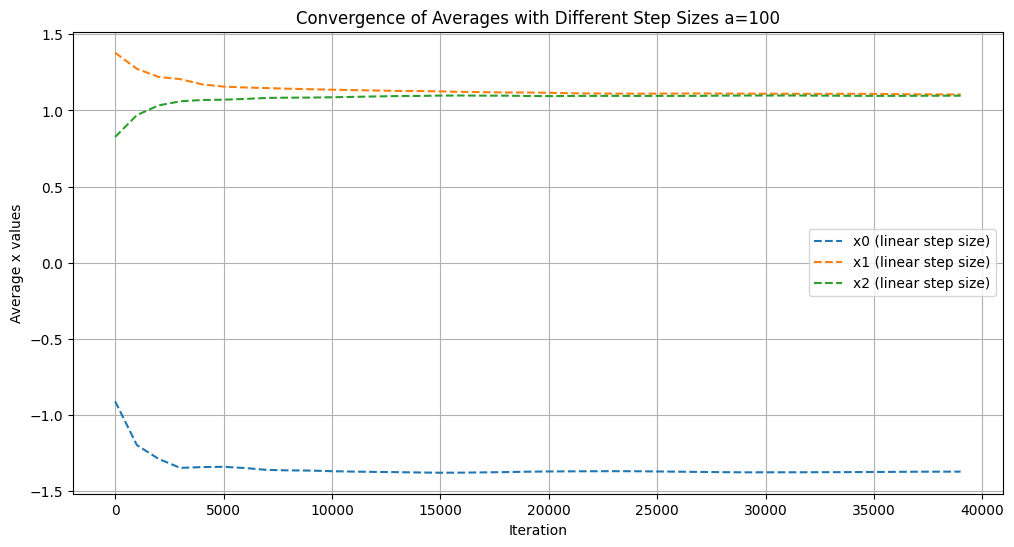

In [60]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot linear step size averages
plt.plot(np.arange(0,len(x_avg_linear_100[:index]))*1000,np.array(x_avg_linear_100)[:index, 0], label="x0 (linear step size)", linestyle="--")
plt.plot(np.arange(0,len(x_avg_linear_100[:index]))*1000,np.array(x_avg_linear_100)[:index, 1], label="x1 (linear step size)", linestyle="--")
plt.plot(np.arange(0,len(x_avg_linear_100[:index]))*1000,np.array(x_avg_linear_100)[:index, 2], label="x2 (linear step size)", linestyle="--")

plt.xlabel("Iteration")
plt.ylabel("Average x values")
plt.title("Convergence of Averages with Different Step Sizes a=100")
plt.legend()
plt.grid()
plt.show()